# Projeto 1 - Felipe Scandiuzzi - Turma C

### O objetivo das análises feitas a seguir foi comparar os perfis dos aposentados no ano de 2001 com os perfis dos aposentados no ano de 2014. Para isso, foram utilizados os dados presentes nas Pesquisas Nacionais por Amostra de Domicílio (PNADs) dos respectivos anos realizadas pelo IBGE. Para chegar aos resultados as variáveis utilizadas foram: Recebimento do INSS, Sexo, Idade, Rendimento de aposentadoria do instituto de previdência, Rendimento de algum outro tipo de aposentadoria (Previdência Privada), Anos de estudo e Curso mais elevado que frequentou anteriormente.

## Análises realizadas:

In [404]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange

In [405]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\felipe\Documents


In [406]:
#Importando as PNADs
dados2001 = pd.read_csv("PES2001.zip", sep = ',')#PNAD 2001
dados2014 = pd.read_csv('PES2014csv.zip', sep=',')#PNAD 2014

In [407]:
#Separando apenas os aposentados presentes nas PNADs
Aposentados2001 = dados2001[(dados2001["v9122"] == 2)]
Aposentados2014 = dados2014[(dados2014["V9122"] == 2)]

## Recebimento do INSS (2001 e 2014)

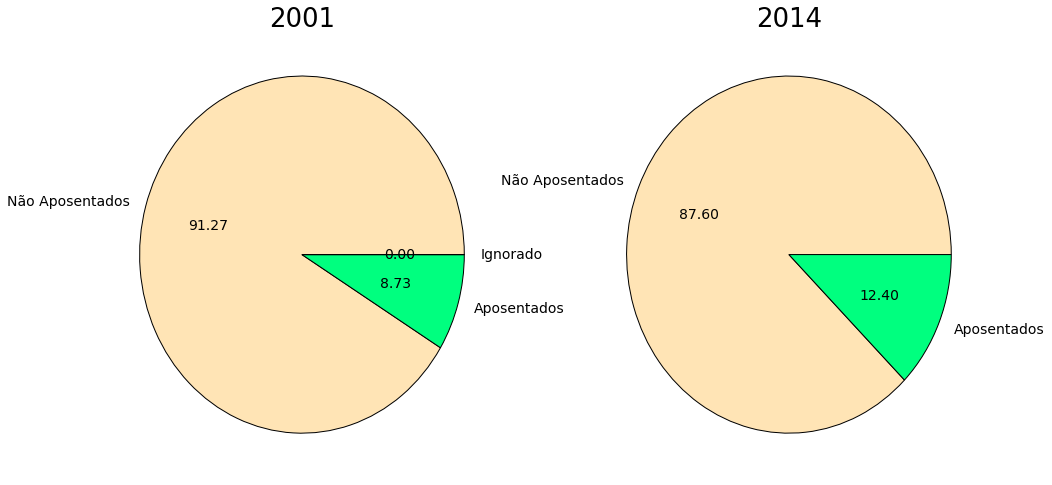

In [408]:
#Renomeando os valores da variável em questão
dados2001.v9122 = dados2001.v9122.astype('category')
dados2001.v9122.cat.categories = ('Ignorado', 'Aposentados','Não Aposentados')
dados2014.V9122 = dados2014.V9122.astype('category')
dados2014.V9122.cat.categories = ('Aposentados', 'Não Aposentados')

fig, axs = plt.subplots(1,2,figsize=(16, 8))#Configuração da posição e do tamanho das figuras

#Código utilizado para plotar o gráfico de pizza com a porcentagem de aposentados e não aposentados em 2001
a = dados2001.v9122.value_counts()
a.plot(kind='pie', subplots = True, colors=('moccasin', 'springgreen'), autopct="%.2f",legend=False,figsize = (8,8), ax=axs[0], fontsize=14)
axs[0].set_ylabel('',fontsize=16)
axs[0].set_title('2001',fontsize=26)

#Código utilizado para plotar o gráfico de pizza com a porcentagem de aposentados e não aposentados em 2014
b = dados2014.V9122.value_counts()
b.plot(kind='pie', subplots = True, colors=('moccasin', 'springgreen'), autopct="%.2f",legend=False,figsize = (8,8), ax=axs[1], fontsize=14)
axs[1].set_ylabel('',fontsize=16)
axs[1].set_title('2014',fontsize=26)

### A observação dos gráficos acima nos permite perceber que a porcentagem de aposentados aumentou quase 4% durante o período analisado. Isso se deve ao fato de que, com o aumento no número de pessoas que começaram a trabalhar a partir da segunda metade do século XIX, o número de aposentados também tende a aumentar. 

## Sexo dos aposentados de 2001 e 2014

C:\Users\felipe\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


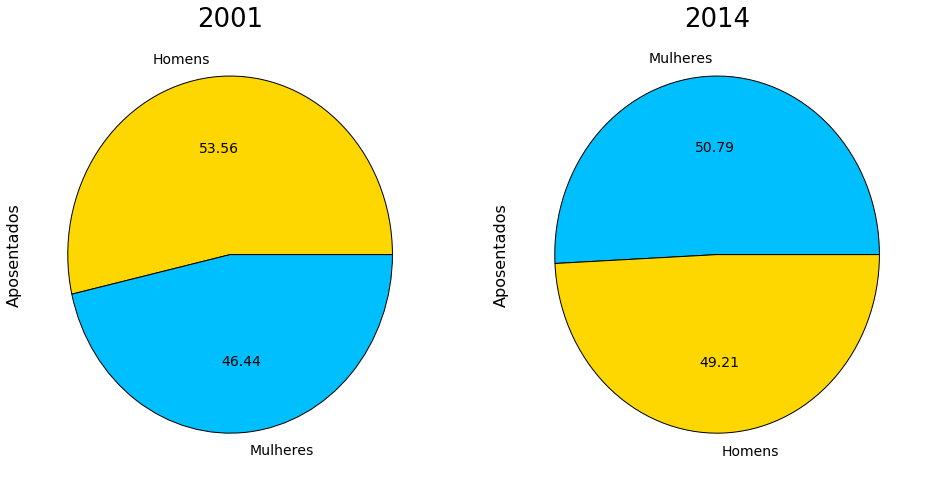

In [409]:
#Renomendo os valores da variável em questão
Aposentados2001.v0302 = Aposentados2001.v0302.astype('category')
Aposentados2001.v0302.cat.categories = ('Homens', 'Mulheres')
Aposentados2014.V0302 = Aposentados2014.V0302.astype('category')
Aposentados2014.V0302.cat.categories = ('Homens', 'Mulheres')

fig, axs = plt.subplots(1,2,figsize=(16, 8))

#Cruzando a variável de aposentados em 2001 com o número de homens e mulheres en 2001 
Sex2001 = Aposentados2001.v0302.value_counts()
Sex2001.plot(kind='pie', subplots=True, colors=('gold', 'deepskyblue'), autopct="%.2f",legend=False,figsize = (8,8), ax=axs[0], fontsize=14)
axs[0].set_ylabel('Aposentados',fontsize=16)
axs[0].set_title('2001',fontsize=26)

#Cruzando a variável de aposentados em 2001 com o número de homens e mulheres en 2014 
Sex2014 = Aposentados2014.V0302.value_counts()
Sex2014.plot(kind='pie', subplots=True, colors=( 'deepskyblue','gold'), autopct="%.2f",legend=False,figsize = (8,8), ax=axs[1], fontsize=14)
axs[1].set_ylabel('Aposentados',fontsize=16)
axs[1].set_title('2014',fontsize=26)


### Os resultados obtidos acima mostram que a porcentagem referente às mulheres na população de aposentados ultrapassou a porcentagem de homens no período de 2001 a 2014. Tal fato também é consequência do aumento da quantidade de pessoas no mercado de trabalho durante a segunda metade do século XIX. O que, consequentemente, resultou em um considerável crescimento no número de mulheres trabalhando, ocasionando a situação modelada acima.

## Idade dos aposentados de 2001 e 2014

In [410]:
#Cálculo da média das idades em 2001
Idade2001 = Aposentados2001.v8005[Aposentados2001.v8005<=120]
print('Média das idades em 2001: ', Idade2001.mean())

Média das idades em 2001:  64.66992526357934


In [411]:
#Cálculo das médias das idades em 2014
Idade2014 = Aposentados2014.V8005[Aposentados2014.V8005<=120]
print('Média das idades em 2014: ', Idade2014.mean())

Média das idades em 2014:  67.38695235877131


### Apenas observando as médias das idades nos dois anos já pode-se perceber que em 2014 as pessoas, em geral, estão se aposentando mais tarde

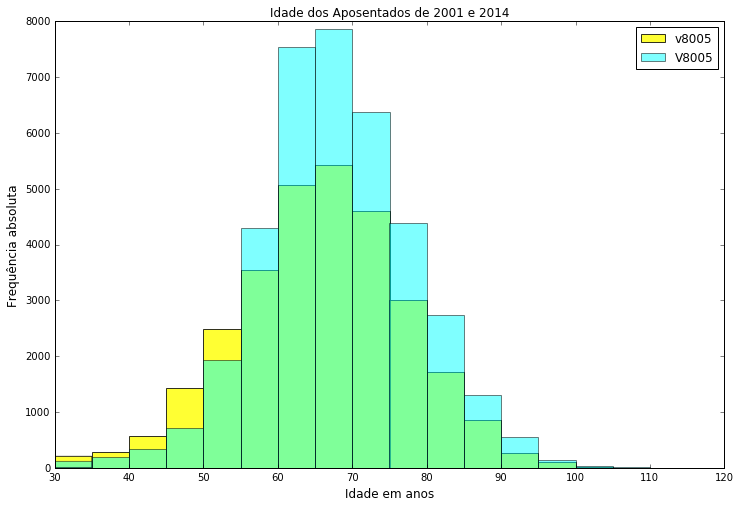

In [448]:
#Separando as idade de 30 a 120 anos em blocos de 5 em 5 anos tanto em 2001 como em 2014
faixa = arange(30, 120, 5)
variávelCateg= pd.cut(Aposentados2001.v8005, faixa)
faixa = arange(30, 120, 5)
variávelCateg= pd.cut(Aposentados2014.V8005, faixa)

#Plotando dois histogramas (um de 2001 e outro de 2014) referentes às idades dos aposentados.
#Sendo que, para facilitar a comparação, foram plotados um sobre o outro
plot = Aposentados2001.v8005.plot.hist(bins=faixa,alpha=0.8, title = "Idade dos Aposentados de 2001 e 2014", figsize = (12,8), color = 'yellow', legend = True)
plot = Aposentados2014.V8005.plot.hist(bins=faixa,alpha=0.5, title = "Idade dos Aposentados de 2001 e 2014", figsize = (12,8), color = 'cyan', legend = True)

plt.xlabel('Idade em anos', fontsize=12)
plt.ylabel('Frequência absoluta', fontsize=12)


### No gráfico acima fica explícito o aumento no número de aposentados com mais de 55 anos e a diminuição do numéro de aposentados abaixo dessa mesma idade. Isso ocorre por causa da melhoria da qualidade de vida epelas mudanças no sitema de previdência do Governo Federal durante esse período.

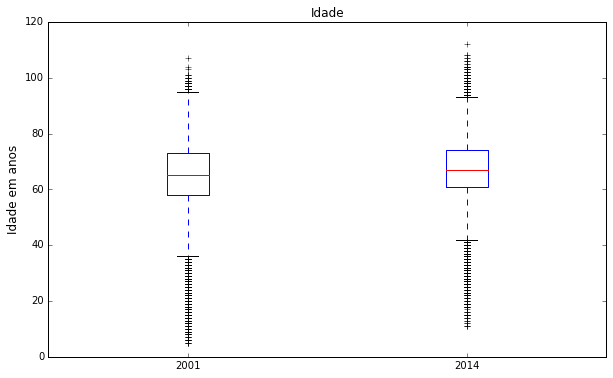

In [413]:
#Código para plotar Boxplot
x = Aposentados2014.V8005
y = Aposentados2001.v8005[Aposentados2001.v8005 < 500]
a = pd.DataFrame([y,x], index = ('2001', '2014'))
a = a.T
a.plot (kind='box', figsize = (10,6), title = "Idade")
plt.ylabel('Idade em anos', fontsize=12)

### Esse Boxplot confirma que a média das idades em 2014 é maior que a média em 2001.

## Rendimento da aposentadoria do instituto de previdência

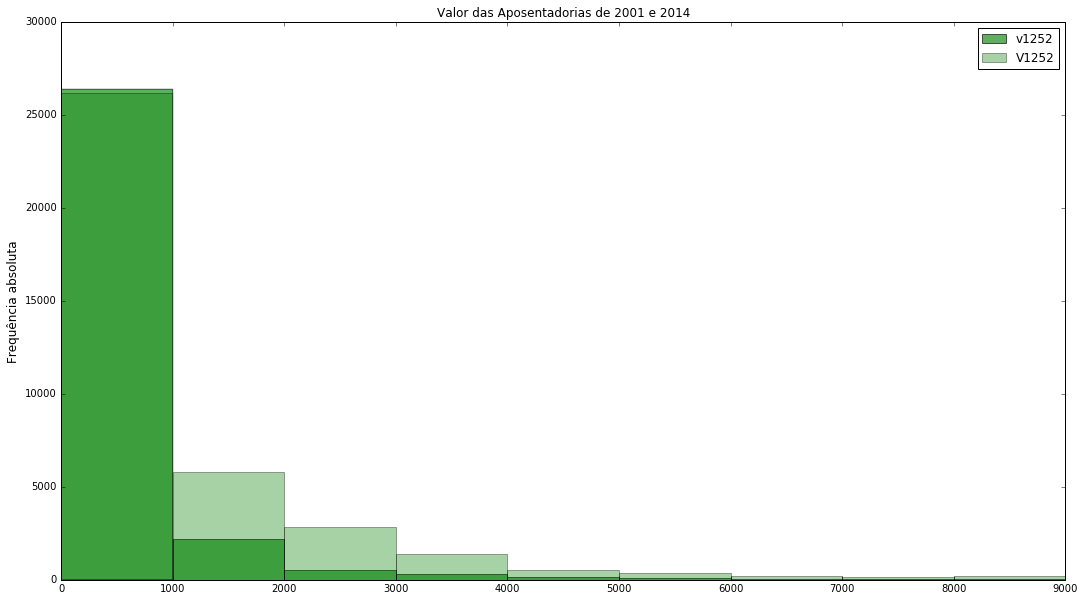

In [449]:
#Separando os valores de aposentadoria de 0 a 10000 anos em blocos de 1000 em 1000 reais tanto em 2001 como em 2014
faixa = arange(0, 10000, 1000)
variávelCateg= pd.cut(Aposentados2014.V1252, faixa)
faixa = arange(0, 10000, 1000)
variávelCateg= pd.cut(Aposentados2001.v1252, faixa)

#Plotando dois histogramas (um de 2001 e outro de 2014) referentes aos valores recebidos pelos aposentados.
plot = Aposentados2001.v1252.plot.hist(bins=faixa,alpha=0.63,figsize = (18,10), color = 'green', legend = True)
plot = Aposentados2014.V1252.plot.hist(bins=faixa,alpha=0.35,figsize = (18,10), color = 'green', legend = True, title = 'Valor das Aposentadorias de 2001 e 2014')
plt.ylabel('Frequência absoluta', fontsize=12)

### Aqui, podemos perceber que, apesar do número de pessoas que recebem entre 0 e 1000 reais ter permanecido praticamente igual, a quantidade de aposentados que recebe valores maiores de aposentadoria aumentou consideravelmente. 

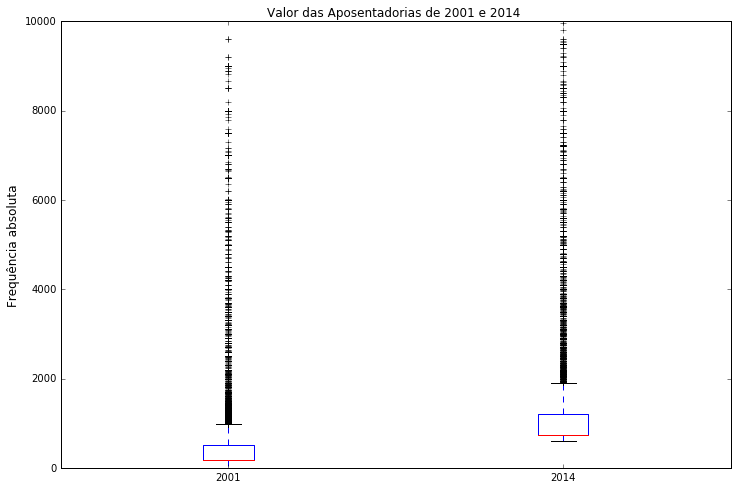

In [436]:
#Código para plotar Boxplot dos valores de aposentadorias de 2001 e 2014
x = Aposentados2014.V1252[Aposentados2014.V1252 < 10000]
y = Aposentados2001.v1252[Aposentados2001.v1252 < 10000]
a = pd.DataFrame([y,x], index = ('2001', '2014'))
a = a.T
a.plot (kind='box', figsize = (12,8), title = "Valor das Aposentadorias de 2001 e 2014 ")
plt.ylabel('Frequência absoluta', fontsize=12)

### O Boxplot acima indica que a média dos valores de aposentadorias em 2014 é maior que a média dos valores em 2001.  

## Rendimento de algum outro tipo de aposentadoria (Previdência Privada)

In [416]:
#Aposentados em 2001 que possuem previdência privada
Aposentados2001.v1257.value_counts()

3.0    192
0.0      1
Name: v1257, dtype: int64

In [417]:
#Aposentados em 2014 que possuem previdência privada
Aposentados2014.V1257.value_counts()

3.0    223
Name: V1257, dtype: int64

### Já podemos perceber aqui que o número de aposentados que também possuem outro tipo de previdência aumentou no período analisado. O que pode ser consequência da maior insegurança em relação à previdência fornecida pelo Governo Federal.

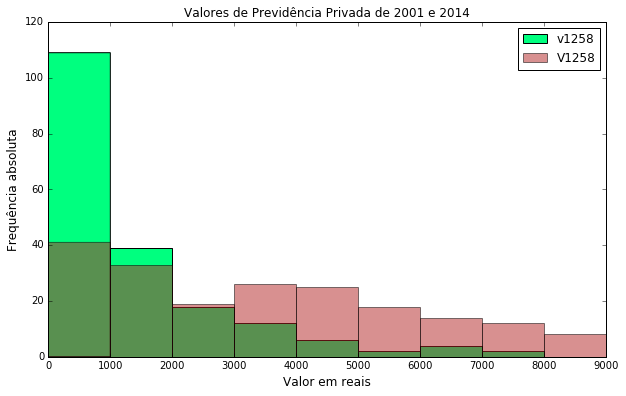

In [465]:
#Separando os valores de aposentadoria de 0 a 10000 anos em blocos de 1000 em 1000 reais tanto em 2001 como em 2014
faixa = arange(0, 10000, 1000)
variável0= pd.cut(Aposentados2014.V1258, faixa)
faixa = arange(0, 10000, 1000)
variável1= pd.cut(Aposentados2001.v1258, faixa)

#Plotando dois histogramas (um de 2001 e outro de 2014) referentes aos valores recebidos pelos aposentados.
#plot = Aposentados2014.V1258.plot.hist(bins=faixa,alpha=1.0,figsize = (10,6), color = 'springgreen', legend = True)

plot = Aposentados2001.v1258.plot.hist(bins=faixa,alpha=1.0,figsize = (10,6), color = 'springgreen', legend = True, title = 'Valores de Previdência Privada de 2001 e 2014')
plot = Aposentados2014.V1258.plot.hist(bins=faixa,alpha=0.5,figsize = (10,6), color = 'firebrick', legend = True)
plt.ylabel('Frequência absoluta', fontsize=12)
plt.xlabel('Valor em reais', fontsize=12)

### Após a analise do gráfico acima podemos dizer que além de ter aumentado o número de pessoas que possuem Previdência Privada, a quantidade de aposentados que recebem valores maiores de benefício também aumentou 

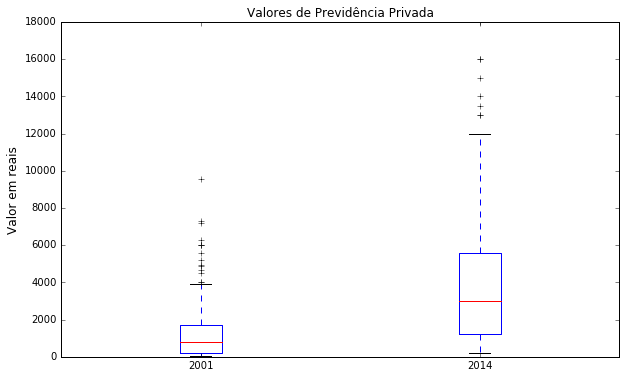

In [451]:
#Código para plotar Boxplot dos valores de Previdência Privada de 2001 e 2014
x = Aposentados2014.V1258[Aposentados2014.V1258 < 20000]
y = Aposentados2001.v1258[Aposentados2001.v1258 < 20000]
a = pd.DataFrame([y,x], index = ('2001', '2014'))
a = a.T
a.plot (kind='box', figsize = (10,6), title = 'Valores de Previdência Privada')
plt.ylabel('Valor em reais', fontsize=12)

### Nesse gráfico tipo Boxplot podemos observar a confirmação de que a média dos valores das Previdências Privadas de 2014  é consideravelmente maior que a média dos mesmos valores de 2001.

## ANOS DE ESTUDO

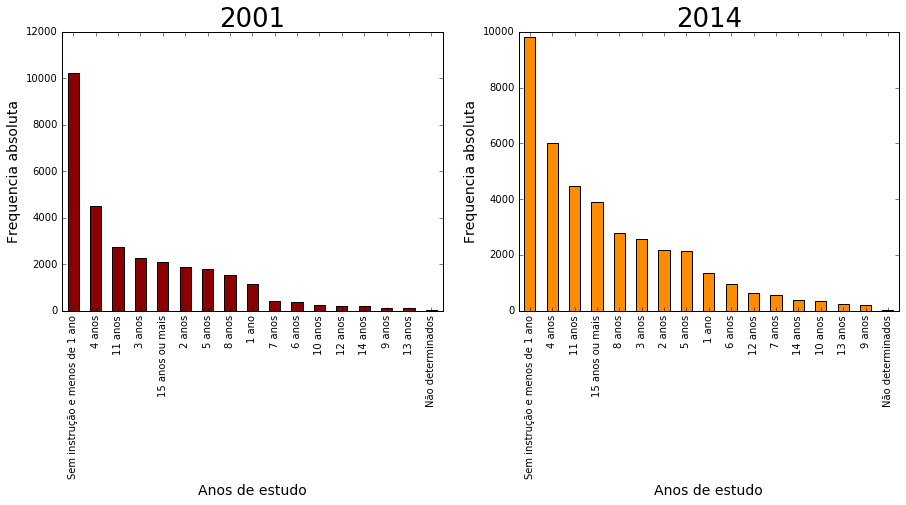

In [422]:
#Renomeando os valores das variáveis em questão
a = Aposentados2014.V4803
a = Aposentados2014.V4803.astype('category')
a.cat.categories = ('Sem instrução e menos de 1 ano', '1 ano','2 anos','3 anos','4 anos','5 anos','6 anos','7 anos','8 anos','9 anos','10 anos','11 anos','12 anos','13 anos','14 anos','15 anos ou mais','Não determinados')

x = Aposentados2001.v4703
x = Aposentados2001.v4703.astype('category')
x.cat.categories = ('Sem instrução e menos de 1 ano', '1 ano','2 anos','3 anos','4 anos','5 anos','6 anos','7 anos','8 anos','9 anos','10 anos','11 anos','12 anos','13 anos','14 anos','15 anos ou mais','Não determinados')

escolar2001 = x.value_counts()
escolar2014 = a.value_counts()

fig, axs = plt.subplots(1,2,figsize=(15, 5))#Configuração da posição e do tamanho das figuras

#Códigos para a plotagem dos gráficos com a frequência absoluta de cada quantidade de anos de estudo em 2001 e 2014
escolar2001.plot(kind='bar', color=['darkred'], ax=axs[0])
axs[0].set_xlabel('Anos de estudo',fontsize=14)
axs[0].set_ylabel('Frequencia absoluta',fontsize=14)
axs[0].set_title('2001', fontsize=26)
escolar2014.plot(kind='bar', color=['darkorange'], ax=axs[1])
axs[1].set_xlabel('Anos de estudo', fontsize=14)
axs[1].set_ylabel('Frequencia absoluta',fontsize=14)
axs[1].set_title('2014',fontsize=26)

### Comparando os dois gráficos acima vemos que teve um grande aumento no número absoluto de pessoas com mais anos de estudo. O que é resultado do maior contato com os estudos durante a segunda metade do século XIX, tanto para mulheres quanto para homens.

## Curso mais elevado que frequentou anteriormente

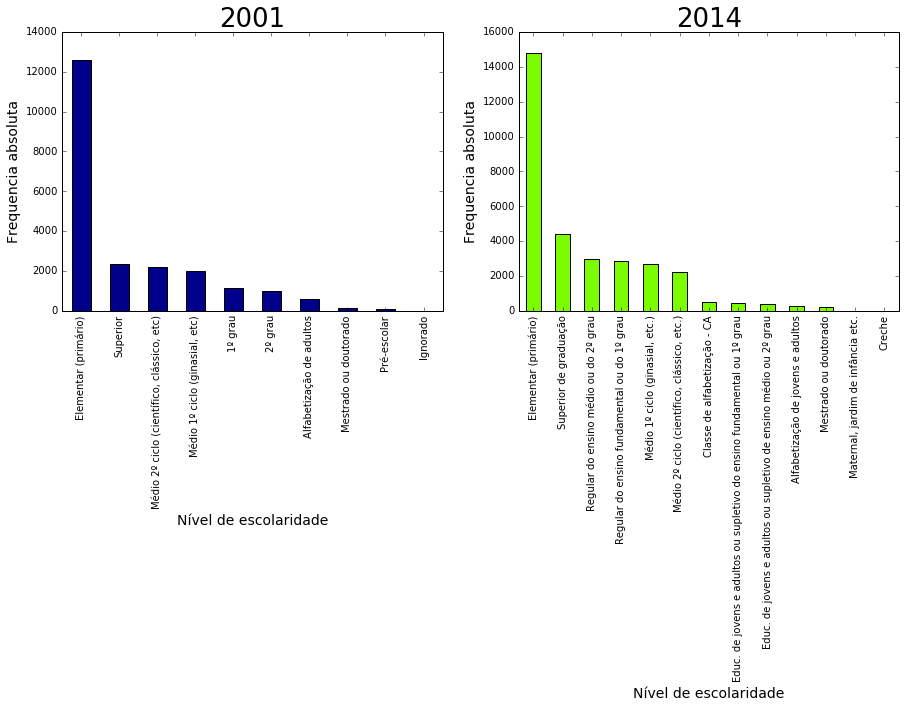

In [469]:
#Renomeando os valores das variáveis em questão
b = Aposentados2001.v0607
b = Aposentados2001.v0607.astype('category')
b.cat.categories = ('Ignorado', 'Elementar (primário)','Médio 1º ciclo (ginasial, etc)',
                    'Médio 2º ciclo (científico, clássico, etc)','1º grau','2º grau','Superior', 
                    'Mestrado ou doutorado', 'Alfabetização de adultos', 'Pré-escolar')
a = Aposentados2014.V6007
a = Aposentados2014.V6007.astype('category')
a.cat.categories = ('Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)',
                                'Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau',
                                'Educ. de jovens e adultos ou supletivo do ensino fundamental ou 1º grau',
                                'Educ. de jovens e adultos ou supletivo de ensino médio ou 2º grau','Superior de graduação',
                                'Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA',
                                'Maternal, jardim de infância etc.')
escolar2001 = b.value_counts()
escolar2014 = a.value_counts()

fig, axs = plt.subplots(1,2,figsize=(15, 5))#Configuração da posição e do tamanho das figuras

#Códigos para a plotagem dos gráficos com a frequência absoluta de cada curso frequentado pelos aposentados de 2001 e 2014
escolar2001.plot(kind='bar', color=['darkblue'], ax=axs[0])
axs[0].set_xlabel('Nível de escolaridade',fontsize=14)
axs[0].set_ylabel('Frequencia absoluta',fontsize=14)
axs[0].set_title('2001', fontsize=26)
escolar2014.plot(kind='bar', color=['lawngreen'], ax=axs[1])
axs[1].set_xlabel('Nível de escolaridade', fontsize=14)
axs[1].set_ylabel('Frequencia absoluta',fontsize=14)
axs[1].set_title('2014',fontsize=26)

### Ao compararmos esses gráficos podemos perceber que em 2014 há um maior número de aposentados que frequentaram curso de ensino mais elevados. Tanto em níveis considerados médios quanto nos mais superiores. 

# Conclusão:

### Após a análise e comparação das variáveis acima que envolver os aposentados de 2001 e os aposentados de 2014, podemos perceber certas diferenças no perfil dos aposentados de cada um desses anos. Tais diferenças se devem à melhora na qualidade de vida das pessoas na segunda metade do século XIX, principalmente nas melhoras relacionas a educação e a maior proximidade com o mercado de trabalho. 